In [1]:
# Primeiro, certifique-se de ter as bibliotecas necessárias instaladas
!pip install numpy matplotlib

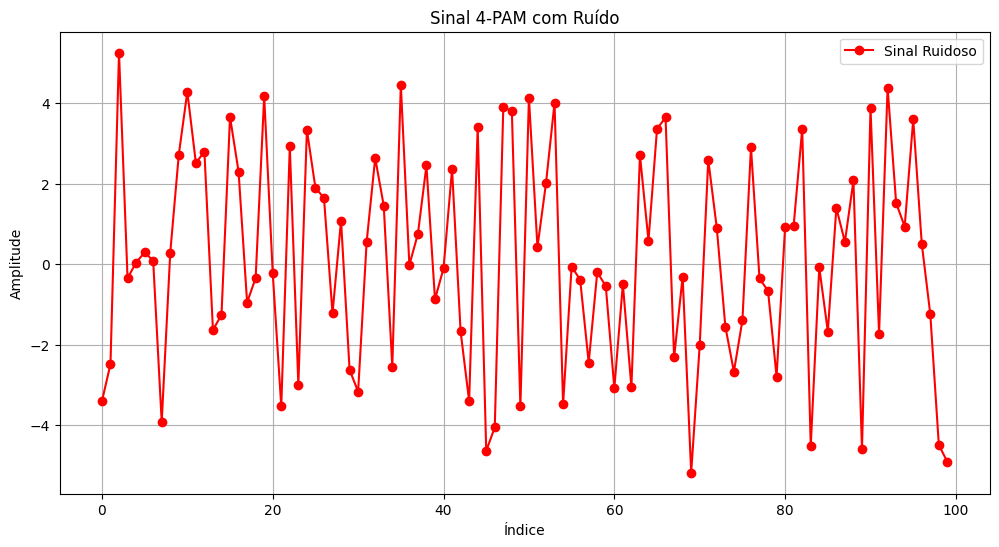

Símbolos Originais vs. Símbolos Demodulados:
[[0 0]
 [0 0]
 [3 3]
 [2 1]
 [2 2]
 [2 2]
 [1 2]
 [0 0]
 [2 2]
 [2 3]
 [3 3]
 [2 3]
 [3 3]
 [1 1]
 [1 1]
 [3 3]
 [2 3]
 [1 1]
 [1 1]
 [3 3]
 [1 1]
 [1 0]
 [3 3]
 [0 0]
 [3 3]
 [2 2]
 [3 2]
 [2 1]
 [3 2]
 [0 0]
 [0 0]
 [2 2]
 [2 3]
 [2 2]
 [1 0]
 [3 3]
 [2 1]
 [2 2]
 [3 3]
 [1 1]
 [2 1]
 [3 3]
 [1 1]
 [0 0]
 [3 3]
 [0 0]
 [0 0]
 [3 3]
 [3 3]
 [0 0]
 [3 3]
 [2 2]
 [3 3]
 [3 3]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [2 1]
 [1 0]
 [1 1]
 [0 0]
 [3 3]
 [1 2]
 [3 3]
 [3 3]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [3 3]
 [2 2]
 [1 1]
 [0 0]
 [0 1]
 [3 3]
 [2 1]
 [1 1]
 [0 0]
 [1 2]
 [2 2]
 [3 3]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [3 3]
 [0 0]
 [3 3]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [3 3]
 [1 2]
 [1 1]
 [0 0]
 [0 0]]
Taxa de Erro de Símbolos (SER): 22.00%


In [3]:
import numpy as np  # Para operações numéricas
import matplotlib.pyplot as plt  # Para visualização gráfica

# Número de símbolos a serem gerados
num_symbols = 100  # Tamanho do nosso sinal 4-PAM

# Criação dos símbolos 4-PAM como no exemplo anterior
symbols = np.random.choice([0, 1, 2, 3], size=num_symbols)  # Símbolos originais

# Mapeamento de símbolos para amplitudes 4-PAM
pam_map = {
    0: -3,  # -3 representa 0
    1: -1,  # -1 representa 1
    2: 1,   # 1 representa 2
    3: 3,   # 3 representa 3
}

# Modulação 4-PAM (conversão de símbolos para amplitudes)
pam_signal = np.array([pam_map[s] for s in symbols])

# Simulando um canal ruidoso adicionando ruído gaussiano ao sinal 4-PAM
# Variância do ruído para simular o canal
noise_variance = 1.0  # Definindo a variância do ruído
# Adicionando ruído ao sinal original para simular um canal ruidoso
noisy_signal = pam_signal + np.random.normal(0, np.sqrt(noise_variance), num_symbols)

# Visualização do sinal ruidoso
plt.figure(figsize=(12, 6))
plt.plot(noisy_signal, 'ro-', label='Sinal Ruidoso')  # Gráfico do sinal ruidoso
plt.title("Sinal 4-PAM com Ruído")
plt.xlabel("Índice")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

# Demodulação do sinal 4-PAM
# Critério simples para tomar a decisão sobre qual símbolo corresponde a cada amplitude:
# Para isso,o método mais próximo (nearest neighbor) para escolher o símbolo correto.
def demodulate_4pam(signal):
    # Lista de valores de referência para cada símbolo
    ref_values = np.array([-3, -1, 1, 3])
    # Para cada amplitude do sinal, encontramos o valor mais próximo na lista de referência
    # Para isso, a função `np.argmin` para encontrar o índice do valor mais próximo
    return np.array([np.argmin(np.abs(ref_values - s)) for s in signal])

# Demodulando o sinal ruidoso para obter os símbolos originais
demodulated_symbols = demodulate_4pam(noisy_signal)

# Comparação entre símbolos originais e demodulados para ver quão bem o sinal foi recuperado
comparison = np.column_stack((symbols, demodulated_symbols))

# Visualizar a comparação para verificar erros de demodulação
print("Símbolos Originais vs. Símbolos Demodulados:")
print(comparison)

# Contar os erros para medir a taxa de erro de símbolos (Symbol Error Rate - SER)
num_errors = np.sum(symbols != demodulated_symbols)  # Conta quantos símbolos estão incorretos
ser = num_errors / num_symbols  # Taxa de erro de símbolos (SER)
print(f"Taxa de Erro de Símbolos (SER): {ser:.2%}")
